# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [122]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [123]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [124]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

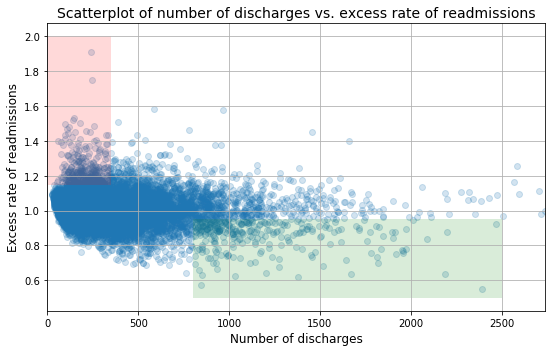

In [125]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### PART A: Do you agree with the above analysis and recommendations? Why or why not?
<p>I partly agree with the analysis, and I disagree with the recommendations.</p>
<p>The analysis has correctly identified the existence of a mild correlation between discharge rates and hospital size, but the analysis fails to identify the most likely cause of that correlation, fails to accurately convey the intensity of the correlation, and, as a result, makes policy recommendations that are almost wholly unsupported by the data and that would be likely to cause more harm than good.</p>
<p>The teardrop shape shown in blue in the graph above is nearly symmetrical across the y = 1.0 line, with variance decreasing as x increases. This is consistent with a null hypothesis where hospital size does not have any causal effect on discharge rates. As hospital size increases, the effective sample size of the data for that hospital also increases, which tends to decrease the variance. Of the 16,000 hospitals that were studied, it appears that only about 100 of those hospitals were truly outside the teardrop shape, and most of those were in the red rectangle where we would naturally expect more variance. As such, a better explanation for the apparent trend is that there are a handful of outliers that happened to fall outside the expected distribution.</p>
<p>My recommendation would be to do in-depth case studies on these outliers in both the red rectangle and the green rectangle to try to learn more about why they have above-average or below-average rates of readmission. It may be that there are some techniques that are worth copying in other hospitals, or it may be that the large hospitals benefit from economies of scale that cannot be easily replicated in less densely populated areas, or it may be that some hospitals have 'expected' readmission rates that do not adequately capture the true acuity of the local population. Based on only the data presented so far, we cannot eliminate any of these possibilities, and so it is not appropriate to take decisive action by forcing smaller hospitals to merge.</p>

In [126]:
data = hospital_read_df
data.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [127]:
data.shape

(16860, 12)

In [128]:
# Test to make sure all Readmission Ratio is numeric

data['Excess Readmission Ratio'].astype(float)

0        1.9095
1        1.7521
2        1.5836
3        1.5760
4        1.5308
5        1.5189
6        1.5079
7        1.5019
8        1.4953
9        1.4844
10       1.4776
11       1.4691
12       1.4612
13       1.4559
14       1.4543
15       1.4532
16       1.4528
17       1.4486
18       1.4348
19       1.4333
20       1.4321
21       1.4317
22       1.4200
23       1.4133
24       1.4088
25       1.4033
26       1.4031
27       1.4026
28       1.4022
29       1.3992
          ...  
16830       NaN
16831       NaN
16832       NaN
16833       NaN
16834       NaN
16835       NaN
16836       NaN
16837       NaN
16838       NaN
16839       NaN
16840       NaN
16841       NaN
16842       NaN
16843       NaN
16844       NaN
16845       NaN
16846       NaN
16847       NaN
16848       NaN
16849       NaN
16850       NaN
16851       NaN
16852       NaN
16853       NaN
16854       NaN
16855       NaN
16856       NaN
16857       NaN
16858       NaN
16859       NaN
Name: Excess Readmission

In [129]:
# Clean up the data, organize it, label it, and discard irrelevant information.
# 'Performance' refers to the ratio of actual readmissions to expected readmissions; lower numbers mean better performance.

clean_data = data[data['Number of Discharges'] != 'Not Available']
clean_data = clean_data.dropna(subset=['Excess Readmission Ratio'])
clean_data = clean_data.loc[:, ['Number of Discharges', 'Expected Readmission Rate', 'Number of Readmissions', 'Excess Readmission Ratio']]
clean_data.columns = ['Discharges', 'Expected Readmit Rate', 'Actual Readmissions', 'Performance']
clean_data['Discharges'] = clean_data['Discharges'].astype(int)
clean_data['Performance'] = clean_data['Performance'].astype(float)
clean_data['Actual Readmissions'] = clean_data['Actual Readmissions'].astype(int)
clean_data['Expected Readmissions'] = clean_data['Discharges'] * clean_data['Expected Readmit Rate'] / 100
clean_data = clean_data[['Discharges', 'Expected Readmit Rate', 'Expected Readmissions', 'Actual Readmissions', 'Performance']]
clean_data.index.name = 'record'
clean_data.tail()

,Discharges,Expected Readmit Rate,Expected Readmissions,Actual Readmissions,Performance
record,,,,,
13725,852,4.8,40.896,18,0.6322
13727,1032,4.8,49.536,23,0.6262
13728,1379,4.5,62.055,30,0.6195
13729,843,5.1,42.993,15,0.5748
13730,2393,4.9,117.257,54,0.5495


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018131278>,
      dtype=object)

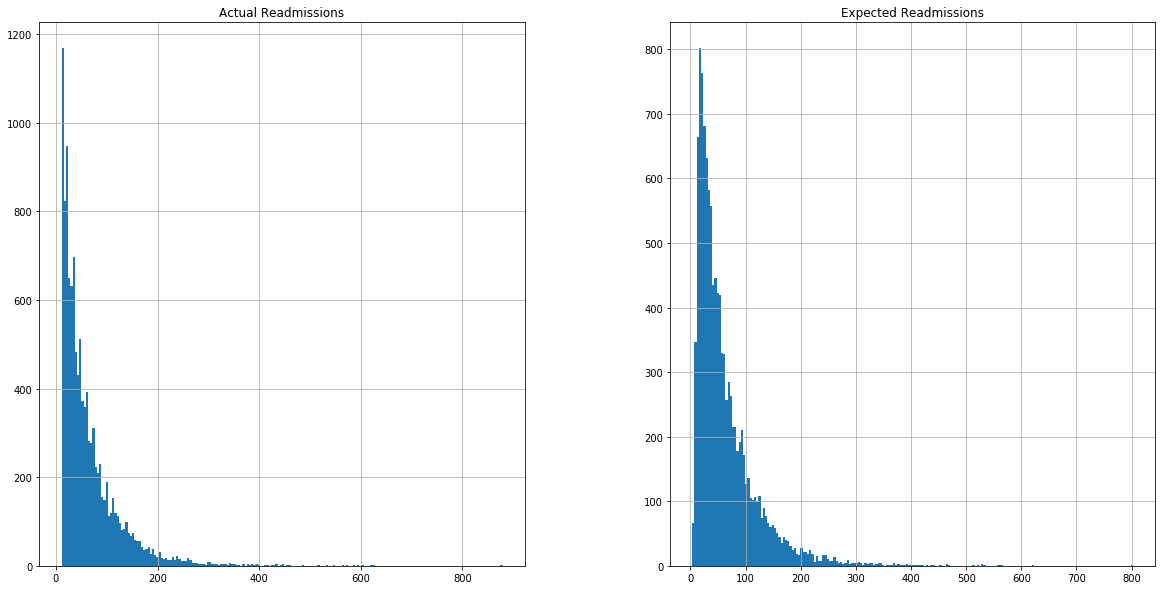

In [130]:
plt.rcParams["figure.figsize"]=20,10
clean_data[['Actual Readmissions', 'Expected Readmissions']].hist(bins = 200)

In [131]:
# Identify mean rate of expected admissions (for general context)
readmit_rate = data['Expected Readmission Rate'].mean() / 100
readmit_rate

0.16866135022940792

In [132]:
# Minimum number of discharges to get 10 expected readmissions (needed for assumption of normality)
10 / readmit_rate

59.29040640548834

In [133]:
# Fraction of hospitals that have less than 60 discharges
data2 = data[data['Number of Discharges'] != 'Not Available']
discharges = data2['Number of Discharges'].astype(float)
small_hospital_count = len(discharges[discharges < 60.0])
small_hospital_count

336

In [134]:
all_hospital_count = len(discharges)
all_hospital_count

11578

In [135]:
from __future__ import division
float(small_hospital_count / all_hospital_count)

0.02902055622732769

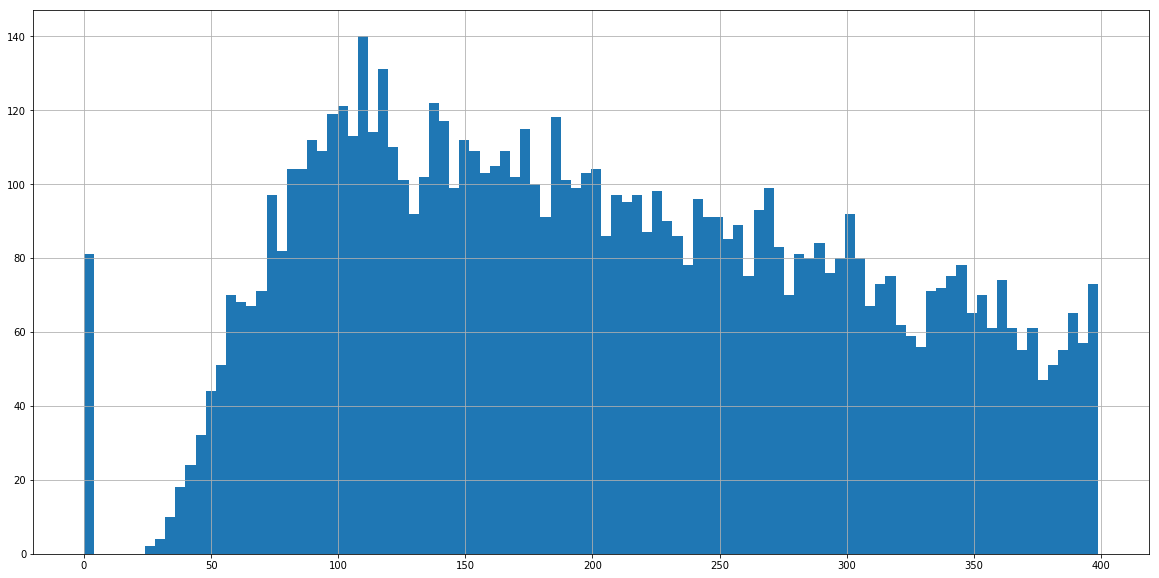

In [136]:
discharges[discharges < 400].hist(bins=100)

### PART B
   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.


##### B-1: Hypothesis Test

<p>Null hypothesis: number of discharges and readmission rates are uncorrelated (r = 0)</p>
<p>Alternative hypothesis: number of discharges and readmission rates are negatively correlated (r < 0)</p>

##### B-2: P-Value

In [137]:
from scipy import stats
stats.pearsonr(clean_data['Discharges'], clean_data['Performance'])

(-0.09739794351079355, 1.222547377680967e-25)

##### B-3: Report Statistical Significance
<p> The correlation is statistically significant at p < 0.01.

##### B-4: Discuss statistical significance vs. practical significance, how they differ, and how this affects my recommendation to the client.

In [138]:
# Run a linear regression to identify the coefficient of regression, which is relevant to assessing practical significance.

import statsmodels.api as sm
X = clean_data['Discharges']
y = clean_data['Performance']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Performance   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     110.1
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           1.22e-25
Time:                        18:57:25   Log-Likelihood:                 11178.
No. Observations:               11497   AIC:                        -2.235e+04
Df Residuals:                   11495   BIC:                        -2.234e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0181      0.001    769.664      0.000       1.016       1.021
Discharges -2.901e-05   2.76e-06    -10.492      0.000   -3.44e-05   -2.36e-05
==============================================================================
Omnibus:                     1666.940   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6839.197
Skew:                           0.671   Prob(JB):                         0.00
Kurtosis:                       6.532   Cond. No.                         741.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Results of Linear Regression:

<p>The p-value is much less than 0.01 (on the order of 10^-25), so the correlation is statistically significant. However, the correlation is also relatively weak: only -0.097. Moreover, the coefficient is tiny: -2.9 * 10^-5. This means that, on the margins, adding 1,000 extra discharges to a hospital per period is only predicted to reduce the readmission rate by 2.9%. Given the intense turmoil and inconvenience associated with closing small rural hospitals in order to merge smaller hospitals together, this is not a practically significant result. For example, combining two hospitals that each have 50 discharges per period would only be expected to reduce the readmission rate by about 0.15%, i.e, by much less than one readmission. On average, merging two small hospitals would not even prevent a single readmission per period.</p>
<p>Because the correlation is only statistically significant, and not practically significant, my recommendation to the client would be unchanged: the government should not require the merger of small hospitals based on the supposed reduction in readmissions that might result.</p>

##### B-5: Create a new plot that better illustrates the conclusions that should be drawn from the data.

In [139]:
# Create a separate dataset showing only 'small' hospitals, i.e., hospitals that have so few expected readmissions that
# they do not meet the criteria of the Central Limit Theorem.

small_hospitals = clean_data[clean_data['Expected Readmissions'] < 10]
small_hospitals.head()

,Discharges,Expected Readmit Rate,Expected Readmissions,Actual Readmissions,Performance
record,,,,,
4,149,5.4,8.046,20,1.5308
5,141,5.3,7.473,19,1.5189
8,98,5.3,5.194,15,1.4953
10,121,6.1,7.381,18,1.4776
11,108,6.3,6.804,17,1.4691


Text(0.5,1,'The weak correlation is mostly driven by hospitals with invalidly small samples')

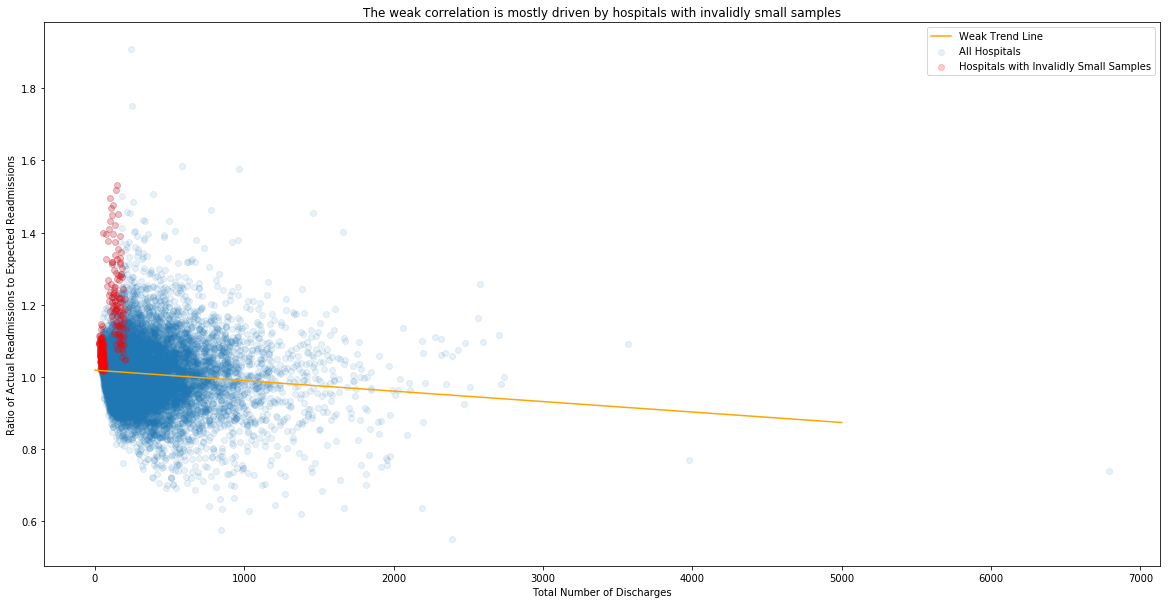

In [150]:
# Graph the scatterplot with hospitals that have fewer than 10 expected readmissions highlighted in red.

_ = plt.scatter(clean_data['Discharges'], clean_data['Performance'], alpha=0.1)
_ = plt.scatter(small_hospitals['Discharges'], small_hospitals['Performance'], alpha=0.2, color='red')
_ = plt.plot([0, 5000], [1.0181, 1.0181 + (-2.901 * (10**-5)) *  5000], color='orange')
plt.ylabel('Ratio of Actual Readmissions to Expected Readmissions')
plt.xlabel('Total Number of Discharges')
plt.legend(['Weak Trend Line', 'All Hospitals', 'Hospitals with Invalidly Small Samples'])
plt.title('The weak correlation is mostly driven by hospitals with invalidly small samples')

In [141]:
normal_hospitals = clean_data[clean_data['Expected Readmissions'] > 10]
normal_hospitals.head()

,Discharges,Expected Readmit Rate,Expected Readmissions,Actual Readmissions,Performance
record,,,,,
0,242,5.6,13.552,38,1.9095
1,247,5.3,13.091,33,1.7521
2,586,4.8,28.128,53,1.5836
3,965,5.7,55.005,95,1.5760
6,390,5.2,20.280,38,1.5079


In [152]:
stats.pearsonr(normal_hospitals['Discharges'], normal_hospitals['Performance'])

(-0.0759842187012104, 7.085319002653548e-16)

In [142]:
# With the non-normal hospitals removed from the dataset, the correlation weakens to -0.075 and the R-squared value
# drops to -0.006, indicating that less than 1% of the variation in hospital performance is accounted for based
# on the size of the hospital.

X = normal_hospitals['Discharges']
y = normal_hospitals['Performance']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Performance   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     65.30
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           7.09e-16
Time:                        18:57:26   Log-Likelihood:                 11250.
No. Observations:               11247   AIC:                        -2.250e+04
Df Residuals:                   11245   BIC:                        -2.248e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0127      0.001    772.260      0.000       1.010       1.015
Discharges -2.192e-05   2.71e-06     -8.081      0.000   -2.72e-05   -1.66e-05
==============================================================================
Omnibus:                     1384.217   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6090.479
Skew:                           0.538   Prob(JB):                         0.00
Kurtosis:                       6.441   Cond. No.                         755.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

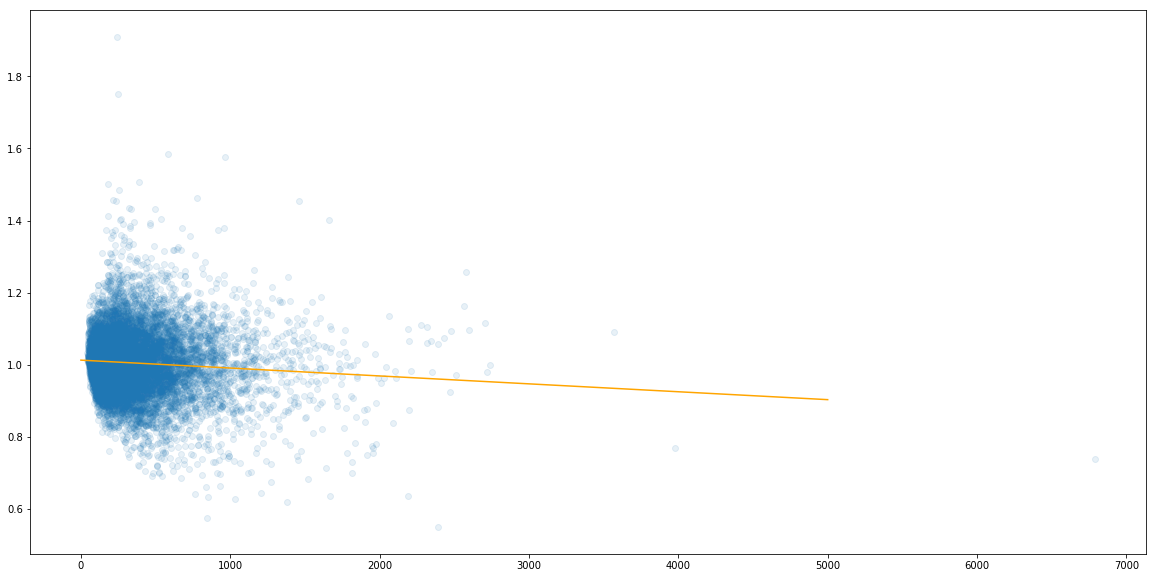

In [143]:
# With the non-normal hospitals dropped from the dataset, it becomes more visually apparent that any correlation
# is driven mostly by a few radical outliers.

_ = plt.scatter(normal_hospitals['Discharges'], normal_hospitals['Performance'], alpha=0.1)
_ = plt.plot([0, 5000], [1.0127, 1.0127 + (-2.192 * (10**-5)) *  5000], color='orange')